# **COMP 2211 Exploring Artificial Intelligence** #
## Lab 8 Convolutional Neural Network (CNN) ##
![cnn_cifar10.png](https://www.researchgate.net/publication/332284670/figure/fig1/AS:745591005007874@1554774156651/Example-of-a-CNN-for-image-classification_W640.jpg)

## Please run the following cells and do not modify anything.

In [ ]:
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
import matplotlib.pyplot as plt
import numpy as np
import os

def let_me_see(history):
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    os.makedirs("models", exist_ok=True) # create a new folder "models" to save your model

# Load and Pre-process the Cifar10 Dataset
The CIFAR-10 dataset (Canadian Institute for Advanced Research, 10 classes) is a subset of the Tiny Images dataset and consists of 60000 32x32 color images. The images are labelled with one of 10 mutually exclusive classes: airplane, automobile (but not truck or pickup truck), bird, cat, deer, dog, frog, horse, ship, and truck (but not pickup truck). There are 6000 images per class with 5000 training and 1000 testing images per class.

Some convention of notation:

N: number of samples

h: height of image

w: width of image

c: number of channels of image

In [ ]:
if __name__ == "__main__":
    # Load the MNIST dataset and split it into training and testing sets
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()

    # Perform data normalization
    x_train = x_train / 255.0
    x_test = x_test / 255.0

    # Convert the labels to one-hot encoded vectors
    y_train = keras.utils.to_categorical(y_train)
    y_test = keras.utils.to_categorical(y_test)

    # x_train: (N, h, w, c) = (50000, 32, 32, 3)
    # y_train: (N, 10) = (50000, 10)
    # x_test: (N, h, w, c) = (10000, 32, 32, 3)
    # y_test: (N, 10) = (10000, 10)

170498071/170498071 [==============================] - 6s 0us/step


In [ ]:
if __name__ == "__main__":
    # There are 10 classes in CIFAR10 dataset
    classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

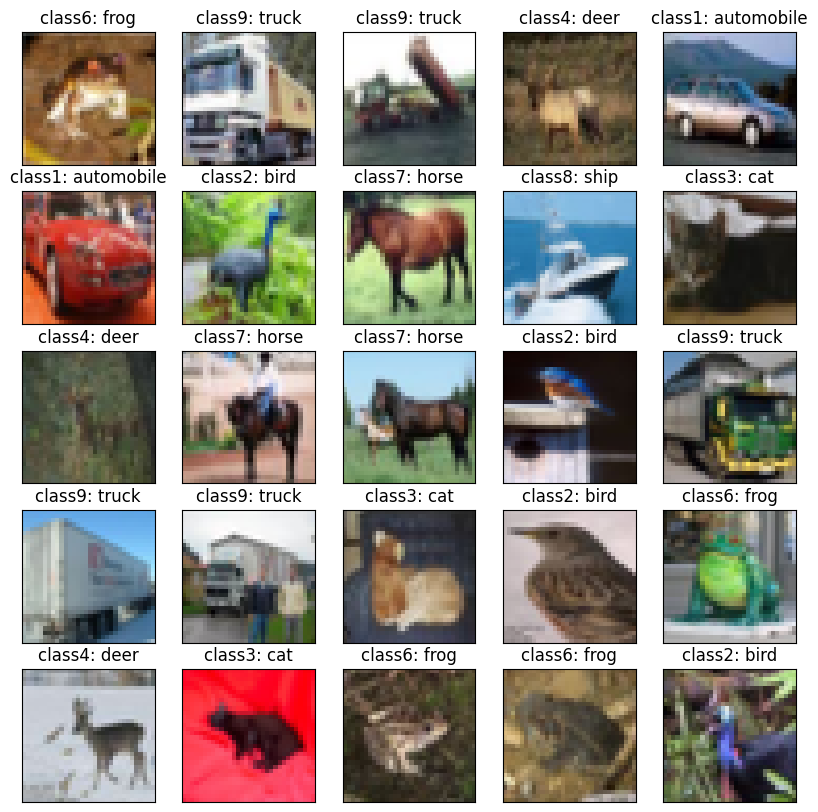

In [ ]:
if __name__ == "__main__":
    # visualize the picture in x_train
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.imshow(x_train[i])
        plt.xticks([])
        plt.yticks([])
        plt.title(f"class{np.argwhere(y_train[i] == 1)[0][0]}: {classes[np.argwhere(y_train[i] == 1)[0][0]]}")

# Task 1 Data Augmentation

After loading and preprocessing the data, we will now augment the data. Data augmentation is a technique to artificially increase the size of the training set by applying transformations to the images. This helps to reduce overfitting and improve the performance of the model.

### TODO 1.1

Build your data augmentation model.

By default, the data augmentation model does not contain any data augmentation layers, but still runnable (you may try the default generator first to see how it performs).

**Remember to add "input_shape=img_shape" to the first layer.**

In [ ]:
def Data_augmentation(img_shape):
    # Create a sequential model
    model = Sequential()

    # TODO 1.1
    # Build your own model with model.add() and following layers
    # Hint: you may consider using
        # RandomFlip(mode): https://keras.io/api/layers/preprocessing_layers/image_augmentation/random_flip/
        # RandomRotation(factor): https://keras.io/api/layers/preprocessing_layers/image_augmentation/random_rotation/
        # RandomZoom(factor): https://keras.io/api/layers/preprocessing_layers/image_augmentation/random_zoom/
    model.add(RandomFlip(mode='horizontal', input_shape=img_shape))
    model.add(RandomRotation(factor=0.1))
    model.add(RandomZoom(height_factor=0.2, width_factor=0.2))

    return model

### Forward image through data augmentation models

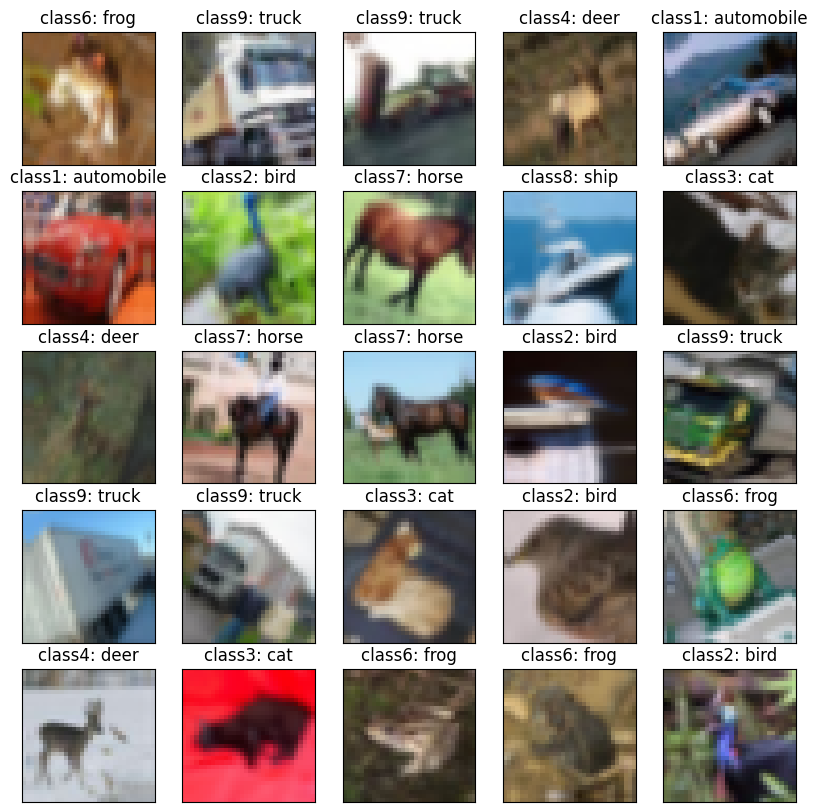

In [ ]:
data_aug = Data_augmentation(img_shape=(32, 32, 3))

if __name__ == "__main__":
    # visualize the augmented images
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.imshow(data_aug(x_train[i: i+1])[0])
        plt.xticks([])
        plt.yticks([])
        plt.title(f"class{np.argwhere(y_train[i] == 1)[0][0]}: {classes[np.argwhere(y_train[i] == 1)[0][0]]}")

# Task 2 CNN Model

After preparing the data, we need to build a model to fit it.

### TODO 2.1
Build your own CNN model

**Remember to add "input_shape=img_shape" to the first layer.**

In [ ]:
def myModel(img_shape, data_aug):
    # Create a sequential model
    model = Sequential()

    # Add the data augmentation layer
    model.add(data_aug)

    # TODO 2.1
    # Build your own model with model.add() and following layers
    # Hint: you may consider using
        # Conv2D(filters, kernel_size, activation='relu'): https://keras.io/api/layers/convolution_layers/convolution2d/
        # MaxPooling2D(pool_size): https://keras.io/api/layers/pooling_layers/max_pooling2d/
        # Flatten(): https://keras.io/api/layers/reshaping_layers/flatten/
        # Dense(units, activation='relu'): https://keras.io/api/layers/core_layers/dense/
        # Dropout(rate): https://keras.io/api/layers/regularization_layers/dropout/
        # BatchNormalization(): https://keras.io/api/layers/normalization_layers/batch_normalization/
        # GlobalAveragePooling2D(): https://keras.io/api/layers/pooling_layers/global_average_pooling2d/
    model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu',padding='same', input_shape=img_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization(trainable=True))
    model.add(Conv2D(filters = 64, kernel_size = (3, 3),padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization(trainable=True))
    model.add(Conv2D(filters = 128, kernel_size = (3, 3),padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization(trainable=True))
    model.add(Conv2D(filters = 128, kernel_size = (3, 3),padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization(trainable=True))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(units = 256, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(units = 10, activation='softmax'))

    return model

### Train your own model

In [ ]:
if __name__ == "__main__":
    # Create the model
    model = myModel(img_shape=(32, 32, 3), data_aug=data_aug)

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Create a callback that saves the model's weights
    checkpointer = keras.callbacks.ModelCheckpoint(
        filepath=os.path.join("models", "weights.hdf5"),
        monitor="val_accuracy",
        verbose=1,
        save_best_only=True)

    # Train the model
    history = model.fit(x_train, y_train, epochs=30, batch_size=64, validation_split=0.2, callbacks=[checkpointer])

Epoch 1/30
618/625 [============================>.] - ETA: 0s - loss: 1.6583 - accuracy: 0.4093
Epoch 1: val_accuracy improved from -inf to 0.49310, saving model to models/weights.hdf5
625/625 [==============================] - 20s 11ms/step - loss: 1.6560 - accuracy: 0.4098 - val_loss: 1.4340 - val_accuracy: 0.4931
Epoch 2/30
 17/625 [..............................] - ETA: 4s - loss: 1.4252 - accuracy: 0.4972

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


624/625 [============================>.] - ETA: 0s - loss: 1.3565 - accuracy: 0.5140
Epoch 2: val_accuracy did not improve from 0.49310
625/625 [==============================] - 6s 9ms/step - loss: 1.3564 - accuracy: 0.5142 - val_loss: 1.4923 - val_accuracy: 0.4873
Epoch 3/30
625/625 [==============================] - ETA: 0s - loss: 1.2213 - accuracy: 0.5640
Epoch 3: val_accuracy improved from 0.49310 to 0.53640, saving model to models/weights.hdf5
625/625 [==============================] - 7s 11ms/step - loss: 1.2213 - accuracy: 0.5640 - val_loss: 1.3870 - val_accuracy: 0.5364
Epoch 4/30
624/625 [============================>.] - ETA: 0s - loss: 1.1376 - accuracy: 0.5958
Epoch 4: val_accuracy improved from 0.53640 to 0.60920, saving model to models/weights.hdf5
625/625 [==============================] - 5s 8ms/step - loss: 1.1372 - accuracy: 0.5960 - val_loss: 1.1250 - val_accuracy: 0.6092
Epoch 5/30
624/625 [============================>.] - ETA: 0s - loss: 1.0680 - accuracy: 0.624

### Evaluate your own model

In [ ]:
if __name__ == "__main__":
    # load the best model
    model = keras.models.load_model(os.path.join('models', 'weights.hdf5'))
    # Evaluate the model on the test data
    test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)
    print(f'Test accuracy: {test_accuracy}')

313/313 [==============================] - 1s 3ms/step - loss: 0.6541 - accuracy: 0.7780
Test accuracy: 0.777999997138977


### Visualize your own model history

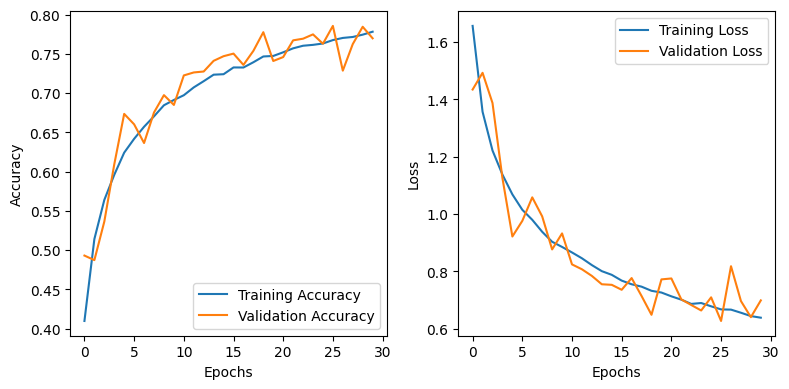

In [ ]:
if __name__ == "__main__":
    let_me_see(history)

### Submission and Grading

You can complete this task with adding data augmentations, running different number of epochs.

Please make the final submission file size smaller than 200 MB (the zip which containing your lab8_tasks.ipynb and weights.hdf5) to make the ZINC submission smooth.

As long as you can get the test accuracy above 75%, you will get full credit for this lab.